<a href="https://colab.research.google.com/github/fidasuci-r/PCD/blob/main/code/UTS_CITRADIGITAL_11190940000027_Fida_Suci_Rahamni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
import cv2
import pandas as pd

### 1

In [ ]:
!mkdir data
!wget -P data/ https://github.com/fidasuci-r/PCD/blob/ab844829855377c28d8cae7127a38481ca529d1c/moon_.jpeg
!wget -P data/ https://github.com/fidasuci-r/PCD/blob/ab844829855377c28d8cae7127a38481ca529d1c/quran_ayat.jpeg
!wget -P data/ https://github.com/fidasuci-r/PCD/blob/d94c8a985c518298b9dd2d943d264833ede490bf/retina_normal2.jpg
!wget -P data/ https://github.com/fidasuci-r/PCD/blob/e504cbf9dc429f77fd6b1c9463b40a28091c04ee/retina_normal1.jpg

mkdir: cannot create directory ‘data’: File exists
--2022-10-31 03:09:24--  https://github.com/fidasuci-r/PCD/blob/ab844829855377c28d8cae7127a38481ca529d1c/moon_.jpeg
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/moon_.jpeg.1’

moon_.jpeg.1            [ <=>                ] 138.17K  --.-KB/s    in 0.01s   

2022-10-31 03:09:24 (12.1 MB/s) - ‘data/moon_.jpeg.1’ saved [141481]

--2022-10-31 03:09:25--  https://github.com/fidasuci-r/PCD/blob/ab844829855377c28d8cae7127a38481ca529d1c/quran_ayat.jpeg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘data/quran_ayat.jpeg’

quran_ayat.jpeg         [ <=>                ] 138.42K  --.-KB/s    in 0.007s  

2022-10-31 03:0

In [ ]:
img= Image.open('/data/moon_.jpeg')
pic = np.array (img)
img2 = Image.open('/data/quran_ayat.jpeg')
pic2 = np.array(img2)
plt.imshow(img)

**Ukuran**

In [ ]:
def cek_ukuran(pic, pic2):
  if pic.shape[0] < pic2.shape[0]:
    pic_=pic
  else:
    pic_=pic2
  return pic_

**Channel**

In [ ]:
def image_channel(image):
  # Check dimensi gambar menggunakan ndim
  if image.ndim == 2:
    channel = 1
    print("gambar ini hanya memiliki 1 channel")
  else:
    height, weight, channel = image.shape
    _, _, c = image.shape
    print("gambar ini memiliki", c, "channels")
  
  return channel

In [ ]:
image_channel(pic)

gambar ini memiliki 3 channels


3

In [ ]:
image_channel(pic2)

gambar ini memiliki 3 channels


3

**Mengecek Kesamaan Dimensi**

In [ ]:
def image_dimension (img1, img2):
  h1, w1, c1 = img1.shape
  h2, w2, c2 = img2.shape

  if h1 == h2 and w1 == w2 and c1 == c2:
    print("images memilki dimensi yang sama, yaitu", h1, w1, c1) 
  
  else:
    if h1 != h2 or w1 != w2:
      if h1 != h2:
        height = min(h1, h2)
        
      if w1 != w2:
        weight = min(w1, w2)
        
        img1 = cv2.resize(img1, (weight, height), interpolation = cv2.INTER_AREA)
        img2 = cv2.resize(img2, (weight, height), interpolation = cv2.INTER_AREA)


In [ ]:
image_dimension (pic, pic2)

images memilki dimensi yang sama, yaitu 1024 768 3


**Central Tendency**

untuk melihat central tendency yang cocok pada gambar, baiknya kita melihat sebaran datanya terlebih dahulu.

In [ ]:
def mean_img(img):
  return (img.mean())
print('mean gambar moon', mean_img(pic))
print('mean gambar quran_ayat', mean_img(pic2))

mean gambar moon 43.52845891316732
mean gambar quran_ayat 1.6322623358832464


Histogram

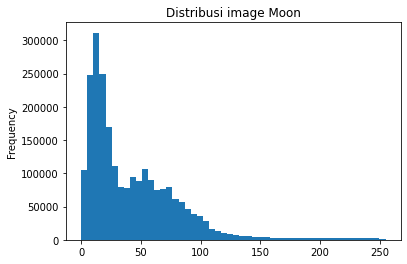

In [ ]:
pd.Series(pic.flatten()).plot(kind='hist',bins= 50,title='Distribusi image Moon')
plt.show()

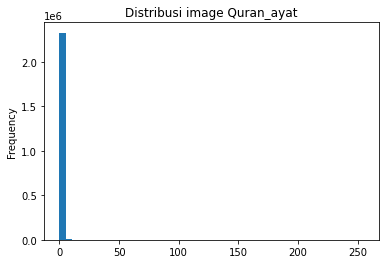

In [ ]:
pd.Series(pic2.flatten()).plot(kind='hist',bins= 50,title='Distribusi image Quran_ayat')
plt.show()

In [ ]:
def plot_box(image):
  pic = np.array(image) # image menjadi array 
  fig = plt.figure()  # membuat plot 
  
  ret, thresh_hold = cv2.threshold(pic, image.mean(), 255, cv2.THRESH_BINARY)
  
  histr = cv2.calcHist([thresh_hold],[0],None,[256],[0,256])
  plt.boxplot(histr)
  
  return fig

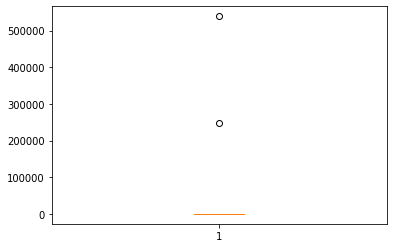

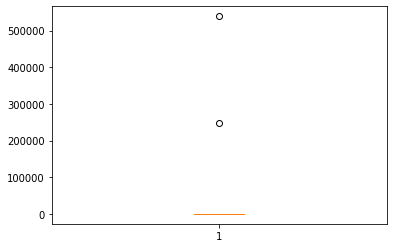

In [ ]:
plot_box(pic)

In [ ]:
plot_box(pic2)

**Kualitas Kontras**

In [ ]:
# Fungsi untuk membaca Image 
# Default fungsi ini adalah Image berwarna
# Jika image grayscale = False maka image akan dirubah ke image gray

# jika image grayscale = True maka akan masuk ke else,, image akan diubah ke image RGB
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [ ]:
# kualitas Kontras

def equalize_this(image_file, with_plot=False, gray_scale=False):

    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    # sebelumnya manggil fungsi read_this

    if not gray_scale: # jika bukan image gray maka image akan diubah ke image RGB
        r_image, g_image, b_image = cv2.split(image_src) # Split image menjadi RGB

        r_image_eq = cv2.equalizeHist(r_image) # cv2.equalizeHist untuk setiap channelnya
        g_image_eq = cv2.equalizeHist(g_image)
        b_image_eq = cv2.equalizeHist(b_image)

        image_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq)) # kemudian akan digabungka
        cmap_val = None
    else: # jika image sudah grayscale
        image_eq = cv2.equalizeHist(image_src) # baru manggil cv2.equalizeHist tadi
        cmap_val = 'gray'

    if with_plot: # menampilkan plot
        fig = plt.figure(figsize=(10, 10))

        ax1 = fig.add_subplot(2, 2, 1)
        ax1.axis("off")
        ax1.title.set_text('Original')
        ax2 = fig.add_subplot(2, 2, 2)
        ax2.axis("off")
        ax2.title.set_text("Equalized")

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_eq, cmap=cmap_val)
        return True
    return image_eq

True

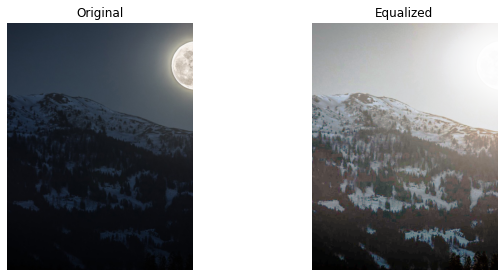

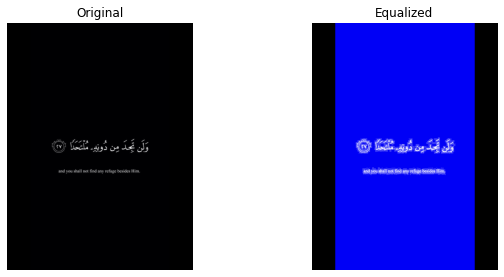

In [ ]:
equalize_this(image_file='/content/moon_.jpeg', with_plot=True)
equalize_this(image_file='/content/quran_ayat.jpeg', with_plot=True)

**Operasi Min Max**

In [ ]:
def operasi_min_max(pic,pic2):
  if pic.shape != pic2.shape : 
    size_min = cek_ukuran(pic,pic2)
    dim = (size_min.shape[0], size_min.shape[1])
    resize_ = cv2.resize(size_min,dim,interpolation=cv2.INTER_AREA)
    print("ukuran berbeda, sehingga size diubah (ke image yang berukuran minimum menjadi) ",size_min.shape)
  else:
    maxIMG = cv2.max(pic,pic2)
    minIMG = cv2.min(pic,pic2)
    imageio.imwrite('MAX01.jpeg', maxIMG)
    imageio.imwrite('MIN01.jpeg', minIMG)

In [ ]:
operasi_min_max(pic,pic2)

**Negative**

In [ ]:
def negative_image(img):
  # Converting Colors
  rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
  # Splitting image
  R, G, B = np.array(cv2.split(rgb_image))

  red = 255 - R
  green = 255 - G
  blue = 255 - B
        
  result = cv2.merge([red, green, blue])
  # cv2.imwrite("Negative_Color_Image.jpeg", result)
  #cv2_imshow(result)
  # cv2.imwrite("/content/drive/MyDrive/Negative_Color_Image.jpeg", result)

  return result

In [ ]:
image_1 = negative_image(pic)
cv2.imwrite("/content/Negative_Color_moon.jpeg", image_1)

True

In [ ]:
image_2 = negative_image(pic2)
cv2.imwrite("/content/Negative_Color_tulisanayat.jpeg", image_2)

True

### 2

In [ ]:
img3= Image.open('/content/diabeticsa.jpg')
pic3 = np.array (img3)
img4 = Image.open('/content/diabeticsb.jpg')
pic4 = np.array(img4)
img5 = Image.open('/content/retina_normal1.jpg')
pic5 = np.array(img5)
img6 = Image.open('/content/retina_normal2.jpg')
pic6 = np.array(img6)
#plt.imshow(img6)

**EDA**

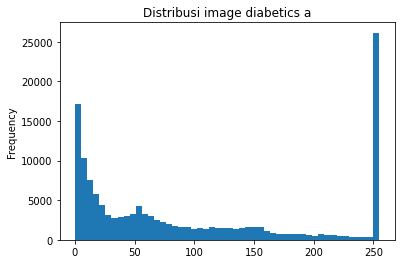

In [ ]:
pd.Series(pic3.flatten()).plot(kind='hist',bins= 50,title='Distribusi image diabetics a')
plt.show()

In [ ]:
pic3.flatten()

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

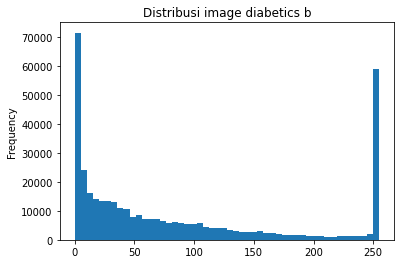

In [ ]:
pd.Series(pic4.flatten()).plot(kind='hist',bins= 50,title='Distribusi image diabetics b')
plt.show()

In [ ]:
pic4.flatten()

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

True

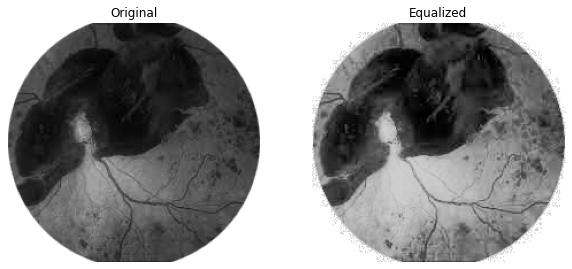

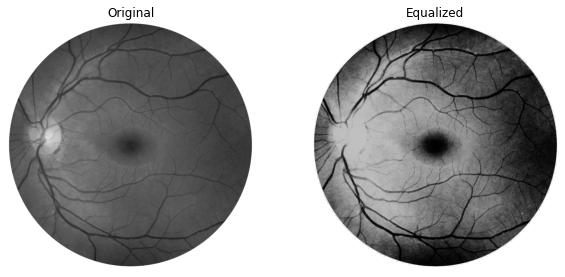

In [ ]:
equalize_this(image_file='/content/diabeticsa.jpg', with_plot=True, gray_scale=True)
equalize_this(image_file='/content/retina_normal1.jpg', with_plot=True, gray_scale=True)

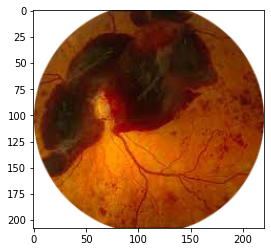

In [ ]:
# Fungsi untuk membaca Image 
# Default fungsi ini adalah Image berwarna
# Jika image grayscale = False maka image akan dirubah ke image gray
def binary(image):
  ret, thresh_hold = cv2.threshold(pic, image.mean(), 255, cv2.THRESH_BINARY)
  return image
binary(pic3)
plt.imshow(pic3)

In [ ]:
# jika image grayscale = True maka akan masuk ke else,, image akan diubah ke image RGB
def read_this(image_file, gray_scale=False, binary = False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    elif binary:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [ ]:
def binary(image):
  ret, thresh_hold = cv2.threshold(pic, image.mean(), 255, cv2.THRESH_BINARY)
  if image < thresh_hold:
    image = 1
  else:
    image = 250
  return image
binary(pic3)

ValueError: ignored